<h1>Project 14</h1>

<h2>Restaurant Food Cost</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df_train=pd.read_excel("Food_Train.xlsx")
df_train["Type of data"]="Train"
df_test=pd.read_excel("Food_Test.xlsx")
df_test["Type of data"]="Test"
df=pd.concat([df_train,df_test])
df.reset_index(drop=True,inplace=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Type of data
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Train
...,...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,Test
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,Test
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,Test
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,Test


<h2>Start of EDA process</h2>

***Checking data types and null count of the columns***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   Type of data   16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df.shape

(16921, 10)

We can see that there are missing values in city,locality,rating and votes. The missing values in cost is for the test dataset, we can ignore that.

In [5]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
Type of data        0
dtype: int64

In [6]:
df_test.shape

(4231, 9)

In [7]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [8]:
df['CITY'].value_counts()

Chennai                       2855
Bangalore                     2835
Hyderabad                     2458
Mumbai                        2311
New Delhi                     1754
                              ... 
navi mumbai                      1
Arumbakkam chennai-600106.       1
Gandhinagar Rd                   1
Near Sector 110 Noida            1
opp gurudwara Shakurpur          1
Name: CITY, Length: 450, dtype: int64

In [9]:
df['LOCALITY'].value_counts()

Gachibowli                                     216
Indiranagar                                    187
Kakkanad                                       175
Kukatpally                                     171
Madhapur                                       169
                                              ... 
Pillar 178 East Patel Nagar                      1
9th Main Yarab Nagar Main Road Banashankari      1
Mahavir Nagar                                    1
Kerala 683501                                    1
Zehra Nagar                                      1
Name: LOCALITY, Length: 1636, dtype: int64

In [10]:
df['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [11]:
df['VOTES'].value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
24 votes      81
              ..
3340 votes     1
1475 votes     1
890 votes      1
2291 votes     1
4186 votes     1
Name: VOTES, Length: 2075, dtype: int64

In [12]:
df['CITY'].replace(np.nan, "Chennai", inplace=True)
df['LOCALITY'].replace(np.nan, "Gachibowli", inplace=True)
df['RATING'].replace(np.nan, "3.9", inplace=True)
df['VOTES'].replace(np.nan, "44 votes", inplace=True)

In [13]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
Type of data        0
dtype: int64

In [14]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
Type of data      object
dtype: object

***Lets convert Votes and Rating column to int or float***

In Rating colum we still have objects such as New and -, which we have to handle first

In [15]:
df["RATING"].describe()

count     16921
unique       32
top         3.9
freq       1647
Name: RATING, dtype: object

Since 3.9 seems to be the top value, we will replace these missing values with 3.5

In [16]:
df["RATING"].replace("NEW",3.5,inplace=True)
df["RATING"].replace("-",3.5,inplace=True)
df["RATING"]=df["RATING"].astype(float)

In [17]:
df['VOTES']=df['VOTES'].str.split(' ').str[0].astype(int)

In [18]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Type of data
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0,Train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0,Train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0,Train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0,Train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0,Train


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16921 non-null  object 
 5   LOCALITY       16921 non-null  object 
 6   RATING         16921 non-null  float64
 7   VOTES          16921 non-null  int32  
 8   COST           12690 non-null  float64
 9   Type of data   16921 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 1.2+ MB


In [20]:
df['CUISINES1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES5']=df['CUISINES'].str.split(',').str[4]

In [21]:
df['TITLE'].value_counts()

QUICK BITES                  5634
CASUAL DINING                4910
None                         1287
CAFÉ                          830
DESSERT PARLOR                508
                             ... 
PUB,FINE DINING                 1
DESSERT PARLOR,PAAN SHOP        1
BAKERY,CONFECTIONERY            1
FOOD TRUCK,DESSERT PARLOR       1
FINE DINING,MICROBREWERY        1
Name: TITLE, Length: 123, dtype: int64

In [22]:
df['TITLE1']=df['TITLE'].str.split(',').str[0]
df['TITLE2']=df['TITLE'].str.split(',').str[1]

In [23]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Type of data,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0,Train,Malwani,Goan,North Indian,NaN,NaN,CASUAL DINING,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0,Train,Asian,Modern Indian,Japanese,NaN,NaN,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0,Train,North Indian,Chinese,Biryani,Hyderabadi,NaN,CASUAL DINING,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0,Train,Tibetan,Chinese,NaN,NaN,NaN,QUICK BITES,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0,Train,Desserts,NaN,NaN,NaN,NaN,DESSERT PARLOR,NaN


In [24]:
df.drop(['TITLE','RESTAURANT_ID','CUISINES','TIME'],axis=1,inplace=True)

In [25]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,Type of data,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,Thane,Dombivali East,3.6,49,1200.0,Train,Malwani,Goan,North Indian,NaN,NaN,CASUAL DINING,NaN
1,Chennai,Ramapuram,4.2,30,1500.0,Train,Asian,Modern Indian,Japanese,NaN,NaN,CASUAL DINING,BAR
2,Chennai,Saligramam,3.8,221,800.0,Train,North Indian,Chinese,Biryani,Hyderabadi,NaN,CASUAL DINING,NaN
3,Mumbai,Bandra West,4.1,24,800.0,Train,Tibetan,Chinese,NaN,NaN,NaN,QUICK BITES,NaN
4,Mumbai,Lower Parel,3.8,165,300.0,Train,Desserts,NaN,NaN,NaN,NaN,DESSERT PARLOR,NaN


***Filling all NAN values with none***

In [26]:
df['CUISINES2'].fillna('None',inplace=True)
df['CUISINES3'].fillna('None',inplace=True)
df['CUISINES4'].fillna('None',inplace=True)
df['CUISINES5'].fillna('None',inplace=True)
df['TITLE2'].fillna('None',inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CITY          16921 non-null  object 
 1   LOCALITY      16921 non-null  object 
 2   RATING        16921 non-null  float64
 3   VOTES         16921 non-null  int32  
 4   COST          12690 non-null  float64
 5   Type of data  16921 non-null  object 
 6   CUISINES1     16921 non-null  object 
 7   CUISINES2     16921 non-null  object 
 8   CUISINES3     16921 non-null  object 
 9   CUISINES4     16921 non-null  object 
 10  CUISINES5     16921 non-null  object 
 11  TITLE1        16921 non-null  object 
 12  TITLE2        16921 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.6+ MB


In [28]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,Type of data,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,Thane,Dombivali East,3.6,49,1200.0,Train,Malwani,Goan,North Indian,None,None,CASUAL DINING,None
1,Chennai,Ramapuram,4.2,30,1500.0,Train,Asian,Modern Indian,Japanese,None,None,CASUAL DINING,BAR
2,Chennai,Saligramam,3.8,221,800.0,Train,North Indian,Chinese,Biryani,Hyderabadi,None,CASUAL DINING,None
3,Mumbai,Bandra West,4.1,24,800.0,Train,Tibetan,Chinese,None,None,None,QUICK BITES,None
4,Mumbai,Lower Parel,3.8,165,300.0,Train,Desserts,None,None,None,None,DESSERT PARLOR,None


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CUISINES1']=le.fit_transform(df['CUISINES1'])
df['CUISINES2']=le.fit_transform(df['CUISINES2'])
df['CUISINES3']=le.fit_transform(df['CUISINES3'])
df['CUISINES4']=le.fit_transform(df['CUISINES4'])
df['CUISINES5']=le.fit_transform(df['CUISINES5'])
df['CITY']=le.fit_transform(df['CITY'])
df['LOCALITY']=le.fit_transform(df['LOCALITY'])
df['TITLE1']=le.fit_transform(df['TITLE1'])
df['TITLE2']=le.fit_transform(df['TITLE1'])

In [30]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST,Type of data,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,400,328,3.6,49,1200.0,Train,61,32,71,89,83,5,5
1,75,1214,4.2,30,1500.0,Train,6,62,45,89,83,5,5
2,75,1272,3.8,221,800.0,Train,74,23,14,34,83,5,5
3,277,161,4.1,24,800.0,Train,102,23,100,89,83,23,23
4,277,709,3.8,165,300.0,Train,30,100,100,89,83,9,9


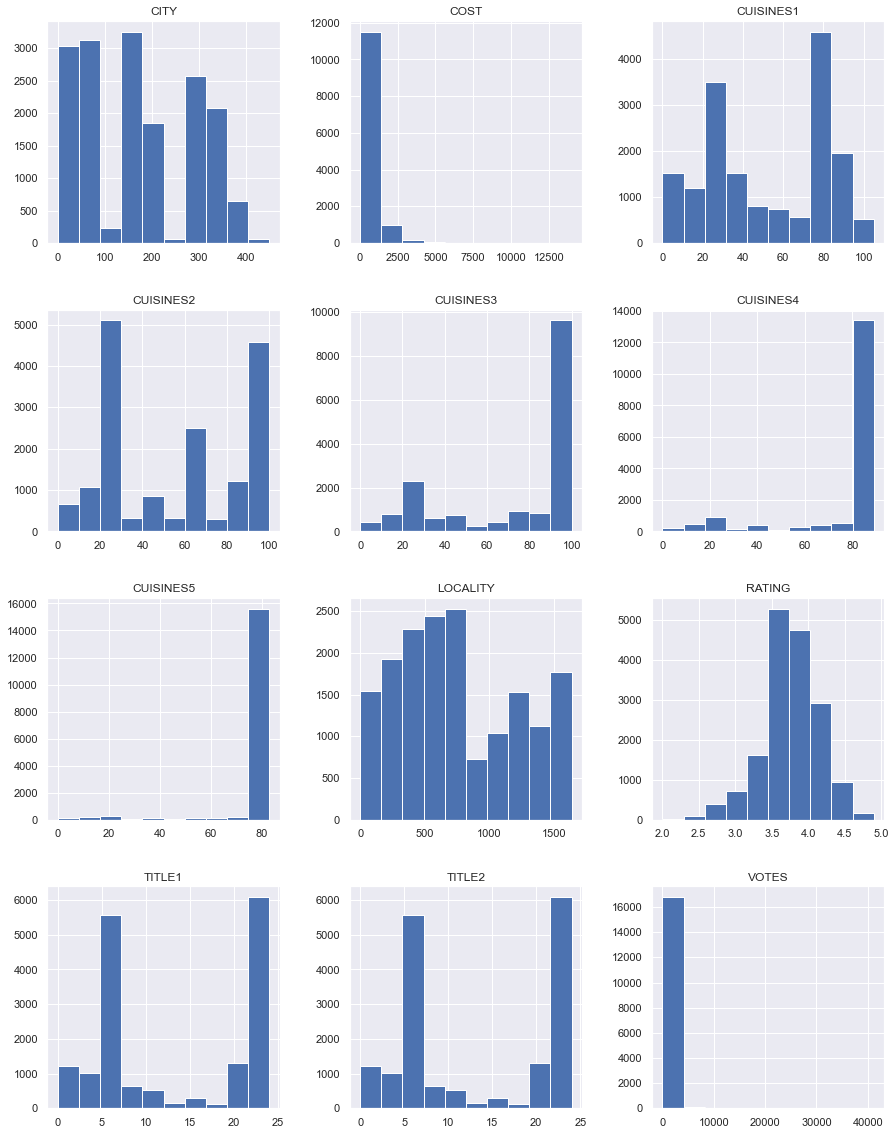

In [31]:
df.hist(figsize=(15,20))
plt.show()

In [32]:
Train=df.loc[df['Type of data']=='Train']
Train.drop(['Type of data'],axis=1,inplace=True)
Train.head()

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,400,328,3.6,49,1200.0,61,32,71,89,83,5,5
1,75,1214,4.2,30,1500.0,6,62,45,89,83,5,5
2,75,1272,3.8,221,800.0,74,23,14,34,83,5,5
3,277,161,4.1,24,800.0,102,23,100,89,83,23,23
4,277,709,3.8,165,300.0,30,100,100,89,83,9,9


In [33]:
Test=df.loc[df['Type of data']=='Test']
Test.drop(['Type of data'],axis=1,inplace=True)
Test.drop(['COST'],axis=1,inplace=True)
Test.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
12690,323,1314,4.3,564,74,23,67,43,83,5,5
12691,277,429,4.2,61,92,28,77,64,83,23,23
12692,277,774,3.8,350,74,83,14,19,83,5,5
12693,128,846,3.8,1445,15,100,100,89,83,20,20
12694,216,570,3.6,23,92,48,100,89,83,23,23


***Lets calculate correlation***

In [34]:
Train.corr()

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
CITY,1.000000,0.041476,0.039250,0.044821,0.045438,0.015221,0.009777,-0.000491,0.000293,-0.004519,-0.020575,-0.020575
LOCALITY,0.041476,1.000000,-0.028699,-0.029136,-0.014916,0.018951,0.021895,0.014974,0.016295,0.014376,0.028300,0.028300
RATING,0.039250,-0.028699,1.000000,0.364933,0.340020,-0.074514,-0.073795,-0.110871,-0.148648,-0.114638,-0.173530,-0.173530
VOTES,0.044821,-0.029136,0.364933,1.000000,0.255723,-0.040111,-0.085362,-0.147142,-0.139548,-0.100912,-0.141470,-0.141470
COST,0.045438,-0.014916,0.340020,0.255723,1.000000,-0.036211,-0.077254,-0.172412,-0.173086,-0.112777,-0.298694,-0.298694
CUISINES1,0.015221,0.018951,-0.074514,-0.040111,-0.036211,1.000000,0.038284,-0.018745,0.034640,0.032283,0.214511,0.214511
CUISINES2,0.009777,0.021895,-0.073795,-0.085362,-0.077254,0.038284,1.000000,0.262384,0.155832,0.102162,0.142152,0.142152
CUISINES3,-0.000491,0.014974,-0.110871,-0.147142,-0.172412,-0.018745,0.262384,1.000000,0.389483,0.215885,0.176431,0.176431
CUISINES4,0.000293,0.016295,-0.148648,-0.139548,-0.173086,0.034640,0.155832,0.389483,1.000000,0.414492,0.149567,0.149567
CUISINES5,-0.004519,0.014376,-0.114638,-0.100912,-0.112777,0.032283,0.102162,0.215885,0.414492,1.000000,0.105885,0.105885


***Lets visualize using heat map as well***


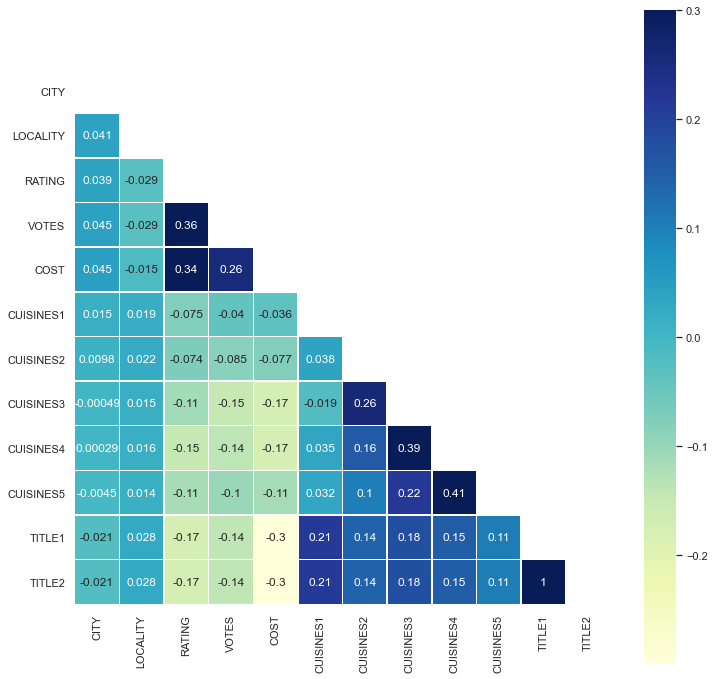

In [35]:
corr = Train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

In [36]:
x=Train.drop(['COST'], axis=1)
x.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,400,328,3.6,49,61,32,71,89,83,5,5
1,75,1214,4.2,30,6,62,45,89,83,5,5
2,75,1272,3.8,221,74,23,14,34,83,5,5
3,277,161,4.1,24,102,23,100,89,83,23,23
4,277,709,3.8,165,30,100,100,89,83,9,9


In [37]:
y=Train[['COST']]
y.head()

,COST
0,1200.0
1,1500.0
2,800.0
3,800.0
4,300.0


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

***Lets import required packages***

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

***Lets split our data randomly and see which model works better***

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

***Lets import all the regression models***

In [40]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [41]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

***Lets create a loop that will execute all our models***

In [42]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  16.739862680164062
Mean_Squared_Error = 300787.40976084623
Cross_Val_Score =  20.03132367442447


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  16.819265465696564
Mean_Squared_Error = 300500.55750529
Cross_Val_Score =  20.039460937854876


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  10.346141617092385
Mean_Squared_Error = 323885.5075925504
Cross_Val_Score =  16.67498802854897


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  38.515032093253765
Mean_Squared_Error = 222121.95212765958
Cross_Val_Score =  43.760335761314984


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  10.84243482778231
Mean_Squared_Error = 322092.58778565796
Cross_Val_Sco

In [43]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,16.739863,300787.409761,20.031324
1,Ridge,16.819265,300500.557505,20.039461
2,ElasticNet,10.346142,323885.507593,16.674988
3,DecisionTreeRegressor,38.515032,222121.952128,43.760336
4,KNeighborsRegressor,10.842435,322092.587786,8.334948
5,AdaBoostRegressor,-56.587625,565691.909537,34.424436
6,RandomForestRegressor,71.181850,104109.085998,70.239284
7,GradientBoostingRegressor,70.517013,106510.888321,69.434629


**Out of all the models we see that GradientBoostingRegressor and RandomForestRegressor is performing comparitively better.**

I am choosing RandomForestRegressor as my final model, hypertuning the model took lot of time hence dropping it due to lack of time

***Lets visualize the performace of our model***

***Improting libraries for plotting***

In [44]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [45]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Input features')
    plt.ylabel('Cost')
    plt.show()
    plt.close()
    
def PollyPlot(x_train, x_test, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [46]:
yh_train = RFR.predict(x_train)

In [47]:
yh_test = RFR.predict(x_test)

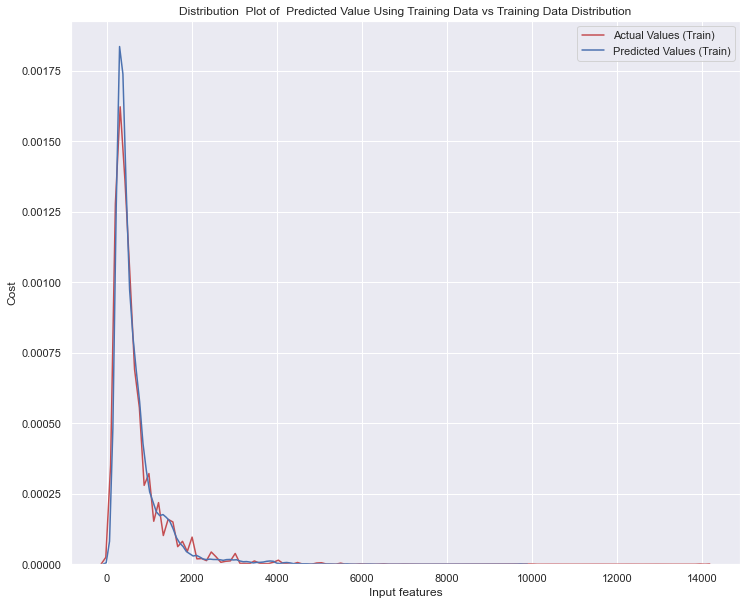

In [48]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yh_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

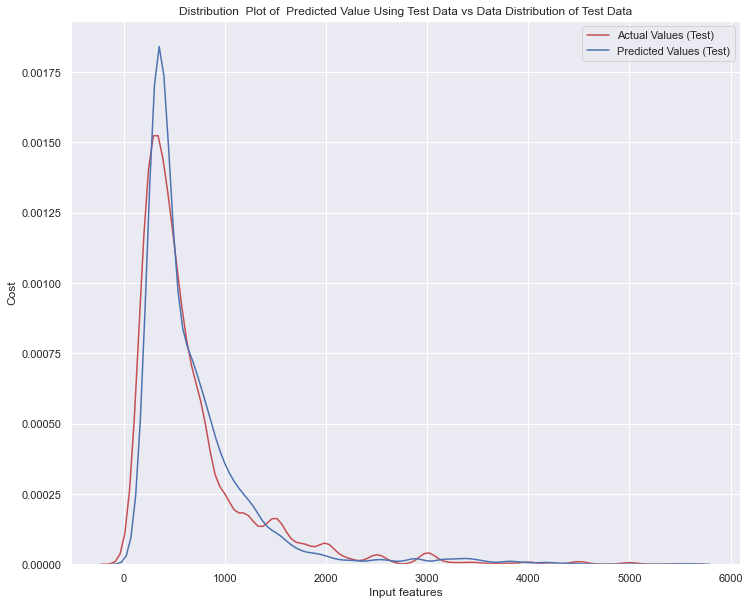

In [49]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)


<h2>End of Machine learning Process for Regression</h2>


Saving the final model

In [50]:
import joblib
joblib.dump(RFR,'Restaurant_Food_Cost.pkl')

['Restaurant_Food_Cost.pkl']

Predicting value for our test set

In [52]:
model=joblib.load("Restaurant_Food_Cost.pkl")
cost=model.predict(Test)
cost

array([1155.5,  399. ,  703.5, ...,  373.5,  251.5,  379. ])

Converting to data frame

In [53]:
Cost_Predicted=pd.DataFrame(cost,columns=["COST"])
Cost_Predicted.head()

,COST
0,1155.5
1,399.0
2,703.5
3,440.0
4,223.5


Saving predicting value in csv format

In [54]:
Cost_Predicted.to_csv("Cost_Predicted.csv")

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">